In [1]:
#Modules
from matplotlib import pyplot as plt
import numpy as np
import math
from celluloid import Camera

In [2]:
#Custom Functions
#Trapezoid Integration Function
def integrate(u,dx,x_vals):
    area_under_curve = 0
    for i in range(0,len(x_vals)-1):
        area = dx * (u[i+1]+u[i]) / 2
        area_under_curve = area_under_curve + area
    return area_under_curve


# Habitat Preference
def preference(x):
    pi = math.pi
    res = 0.1 + math.sin(2 * pi * x / 50) ** 2  # Example 1
    #res = math.exp(-0.01*abs(x-50)**2) # Example 2
    res = np.float64(res)
    return res

# 1st Derivative of Habitat Preference Function
def preference_slope(x):
    pi = math.pi
    res = (2 * pi / 25) * math.cos(pi * x / 25) * math.sin(pi * x / 25)  # Example 1
    #res = -0.02*math.exp(-0.01*(x-50)**2)*(x-50) # Example 2
    res = np.float64(res)
    return res
    

In [3]:
#Load checkpoint

u = np.load("/Users/rhemitoth/Documents/Fall 2022/Math 19a/finalproject/RT_Math19A_Final/np_checkpoints/checkpoint10.0.npy")


In [10]:
max(u[0][1])

0.7978845608028654

In [4]:
#Params
Nt = u.shape[0]
Xs = u[0][0]
dx = 0.05
#Habitat Preference Function
w = np.zeros((1,2,len(Xs)))
w[0][0] = Xs
for i in range(0,len(Xs)):
    w[0][1][i] = preference(w[0][0][i])

#First Spatial Derivative of Habitat Preference Function
wx = np.zeros((1,2,len(Xs)))
wx[0][0] = Xs
for i in range(0,len(Xs)):
    wx[0][1][i] = preference_slope(w[0][0][i])

#Approximating the steady state space use

w0 = integrate(u = (w[0][1]**2),
               dx = dx,
               x_vals = Xs)
steady_state_u = np.zeros((1,2,len(Xs)))
steady_state_u[0][0] = Xs
steady_state_u[0][1] = (w[0][1]**2)/w0

In [ ]:
# Animation
fig1, ax1 = plt.subplots()
camera = Camera(fig1)
for i in range(Nt):
    Ys= u[i][1]
    if i%500 == 0:
        if i == 0:
            ax1.plot(w[0][0], w[0][1], color = "#5a5a5a", label = "w(x)", linestyle = "dashed")
            x = ax1.plot(Xs, Ys, color="#959e19", label="u(x,t)")
            y = ax1.plot(Xs,steady_state_u[0][1], color = 'black', linestyle = 'dotted', label = "steady state u(x,t)")
        else:
            ax1.plot(w[0][0], w[0][1], color="#5a5a5a", linestyle="dashed")
            x = ax1.plot(Xs, Ys, color="#959e19")
            y = ax1.plot(Xs, steady_state_u[0][1], color='black', linestyle='dotted')
        ax1.legend(loc="upper right")

        camera.snap()
animation = camera.animate()
animation.save('AdvectionDiffusion_CDA.mp4', writer = 'ffmpeg')

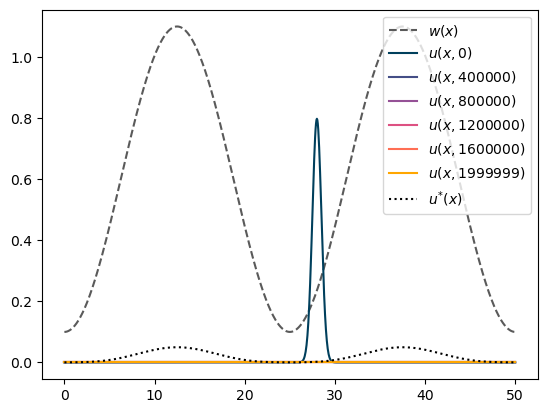

In [12]:
# Plot
fig2 = plt.figure()
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]
plt.plot(Xs,w[0][1], color = "#5a5a5a", label = r"$w(x)$", linestyle = "dashed")
plt.plot(Xs,t0, label = r'$u(x,0)$', color = "#003f5c" )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.2*Nt)})$', color = "#444e86")
plt.plot(Xs,t2, label = fr'$u(x,{int(0.4*Nt)})$', color = "#955196")
plt.plot(Xs,t3, label = fr'$u(x,{int(0.6*Nt)})$', color = "#dd5182")
plt.plot(Xs,t4, label = fr'$u(x,{int(0.8*Nt)})$', color = "#ff6e54")
plt.plot(Xs,t5, label =fr'$u(x,{int(Nt-1)})$', color = "#ffa600")
plt.plot(Xs,steady_state_u[0][1], color = 'black', linestyle = 'dotted', label = r"$u^{*}(x)$")
plt.legend(loc="upper right")
plt.savefig("AdvectionDiffusion.png", dpi = 350)
plt.show()

